# Problem: Detecting fraudulent app usage data with STL and confidence intervals
You are given app usage data, tracking the daily active users. You want to determine anomlies that are indicative of any suspicious activity, such as bots.

We will use Seasonal Trend Decomposition (STL)  decomposition and combine it with statistical methods to detect anomalies in time-series data.  




This code imports essential Python libraries for data analysis, visualization, and time series decomposition:

STL from statsmodels.tsa.seasonal is used for for Seasonal-Trend decomposition of time series data.








In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from statsmodels.tsa.seasonal import STL

In the next cell, load the dataset from the file and display its contents to examine the data structure.


In [25]:
# Your code to read the data using pandas. Assign the data to a variable named 'df'
# Your code to Print few rows of the dataset to see how it looks.
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving product_usage_data.csv to product_usage_data (1).csv
User uploaded file "product_usage_data (1).csv" with length 1462 bytes


In [26]:
df = pd.read_csv('product_usage_data.csv')
df.head()

,timestamp,daily_active_users
0,1/1/2024,1107
1,1/2/2024,1113
2,1/3/2024,1143
3,1/4/2024,1140
4,1/5/2024,1136


Following code converts the 'timestamp' column in the DataFrame df to a datetime format using pandas.to_datetime(), ensuring that the values are recognized as datetime objects for easier time-based operations and analysis


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


Use the following code to display the first few rows of the updated DataFrame and verify the modifications:


In [ ]:
# Your code to  see the updated data. Print first few rows.

df.head()

,timestamp,daily_active_users
0,1/1/2024,1107
1,1/2/2024,1113
2,1/3/2024,1143
3,1/4/2024,1140
4,1/5/2024,1136


Following  code creates a pandas Series named dau using the values from the 'daily_active_users' column of the DataFrame df, setting the 'timestamp' column as the index to enable time series operations.


In [ ]:
dau = pd.Series(data=df['daily_active_users'].values, index=df['timestamp'])


In the next cell, plot the dau data using the Matplotlib library. Ensure that the plot includes appropriate labels for the x-axis and y-axis, as well as a suitable title.



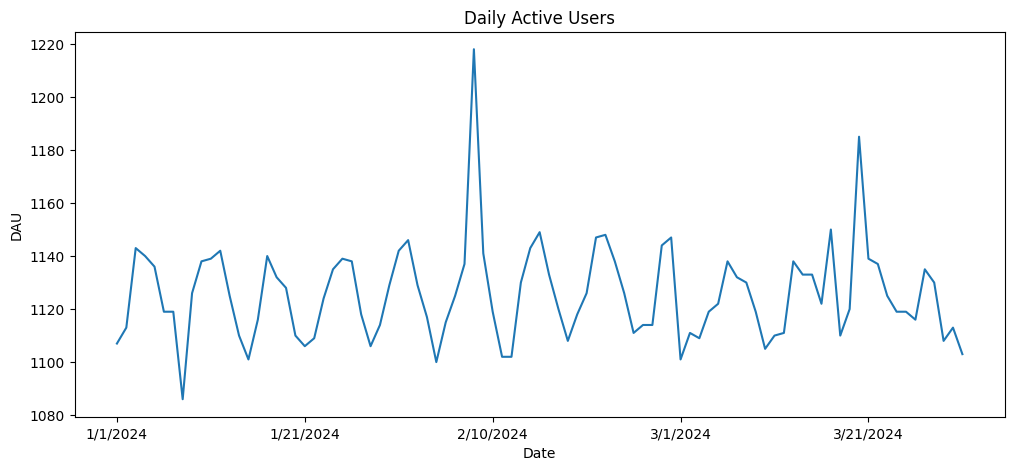

In [ ]:
#
#
#
# Your code to Plot the data 'dau' using matplot library. Give suitable names to the x label, y label and title
#
#

dau.plot(figsize=(12,5))
plt.xlabel("Date")
plt.ylabel("DAU")
plt.title("Daily Active Users")
plt.show()

The code dau.describe() is calling the .describe() method on a DataFrame named dau.



In [ ]:
dau.describe()


,0
count,91.000000
mean,1125.703297
std,18.362700
min,1086.000000
25%,1113.000000
50%,1125.000000
75%,1138.000000
max,1218.000000


Folloiwng code decomposes the time series data dau into trend, seasonal, and residual components using the STL method, specifying weekly seasonality (period=7), and stores the results in res.


In [ ]:
stl = STL(dau, period=7)  # weekly seasonality
res = stl.fit()



In the following cell, print the different time series components.

In [ ]:
print(res.seasonal)
# Your code to print trend component
# Your code to print residual component. res.resid is the residual component
print (res.resid)

timestamp
1/1/2024    -29.112699
1/2/2024     -9.007788
1/3/2024     16.681902
1/4/2024     10.810216
1/5/2024     13.981569
               ...    
3/27/2024    26.987993
3/28/2024     6.704833
3/29/2024    -0.830159
3/30/2024    -1.994414
3/31/2024    -2.578938
Name: season, Length: 91, dtype: float64
timestamp
1/1/2024      7.792122
1/2/2024     -5.460343
1/3/2024     -0.364701
1/4/2024      3.225742
1/5/2024     -3.297178
               ...    
3/27/2024   -11.588982
3/28/2024     6.737338
3/29/2024    -4.680917
3/30/2024     4.532161
3/31/2024    -1.837280
Name: resid, Length: 91, dtype: float64


Following code, creates the plot of various time series components like, trend, seasonality, and residual.

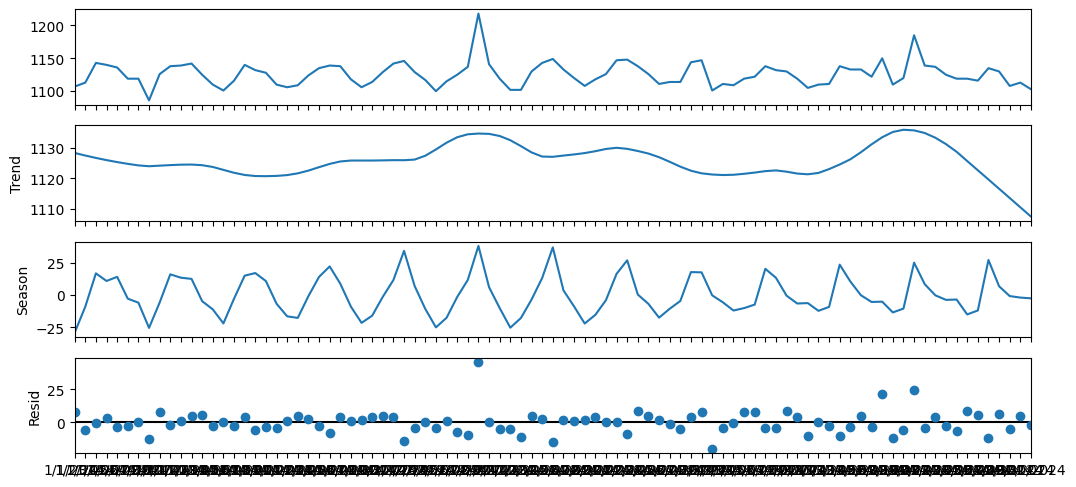

In [ ]:
#plot 4 components, original, residual, trend, and noise using matplotlib

fig = res.plot()
fig.set_size_inches(12, 5)
plt.show()

Following code is used for minor anomaly detection by defining an upper and lower threshold around the trend component of the time series. These thresholds, trend_iv_l_minor and trend_iv_u_minor, are set by adjusting the trend with the mean and standard deviation of the residuals. Values outside this range can be considered anomalies, as they deviate significantly from the expected trend behavior.

In [ ]:
trend_iv_l_minor = pd.Series(data=res.trend.values-np.mean(res.trend)-np.std(res.resid), index=res.trend.index)
trend_iv_u_minor = pd.Series(data=res.trend.values-np.mean(res.trend)+np.std(res.resid), index=res.trend.index)\

minor_anom = np.where((res.resid < trend_iv_l_minor) | (res.resid > trend_iv_u_minor), res.resid, np.nan)


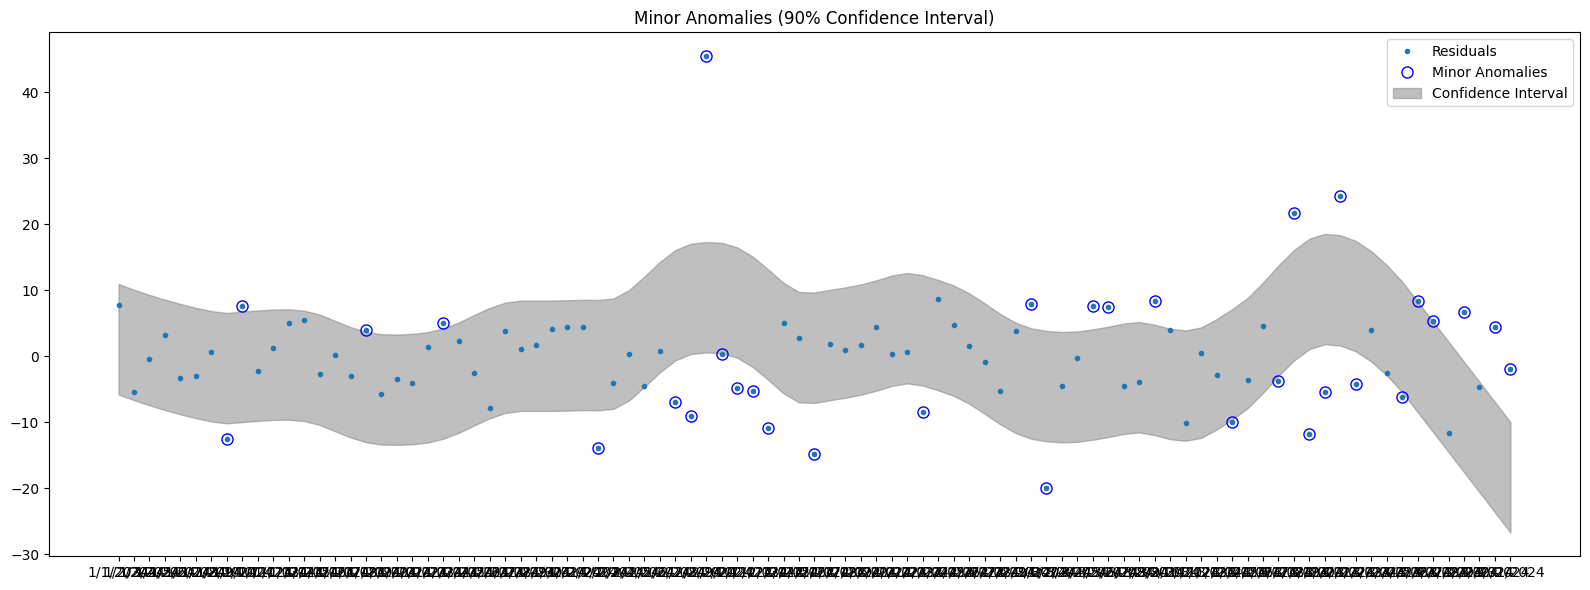

In [27]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a single figure with one axis (ax)
fig, ax = plt.subplots(figsize=(16, 6))
# Plot the residuals
ax.plot(res.resid, marker='.', linestyle='none', label='Residuals')
# Plot the minor anomalies (blue circles)
ax.plot(pd.Series(minor_anom, res.resid.index), marker='o', linestyle='none', label='Minor Anomalies', color='blue', fillstyle='none', markersize=8)
# Fill the confidence interval (grey shaded area)
ax.fill_between(res.resid.index, trend_iv_l_minor, trend_iv_u_minor, color='grey', alpha=0.5, label='Confidence Interval')
# Set the title and labels
ax.set_title('Minor Anomalies (90% Confidence Interval)')
# Add a legend
ax.legend()
# Display the plot
plt.tight_layout()
plt.show()



Bsed on the above code, write Python code to find anomalies that are 2 times and 3 times away from standard deviation. Use trend component for detecting anomalies.

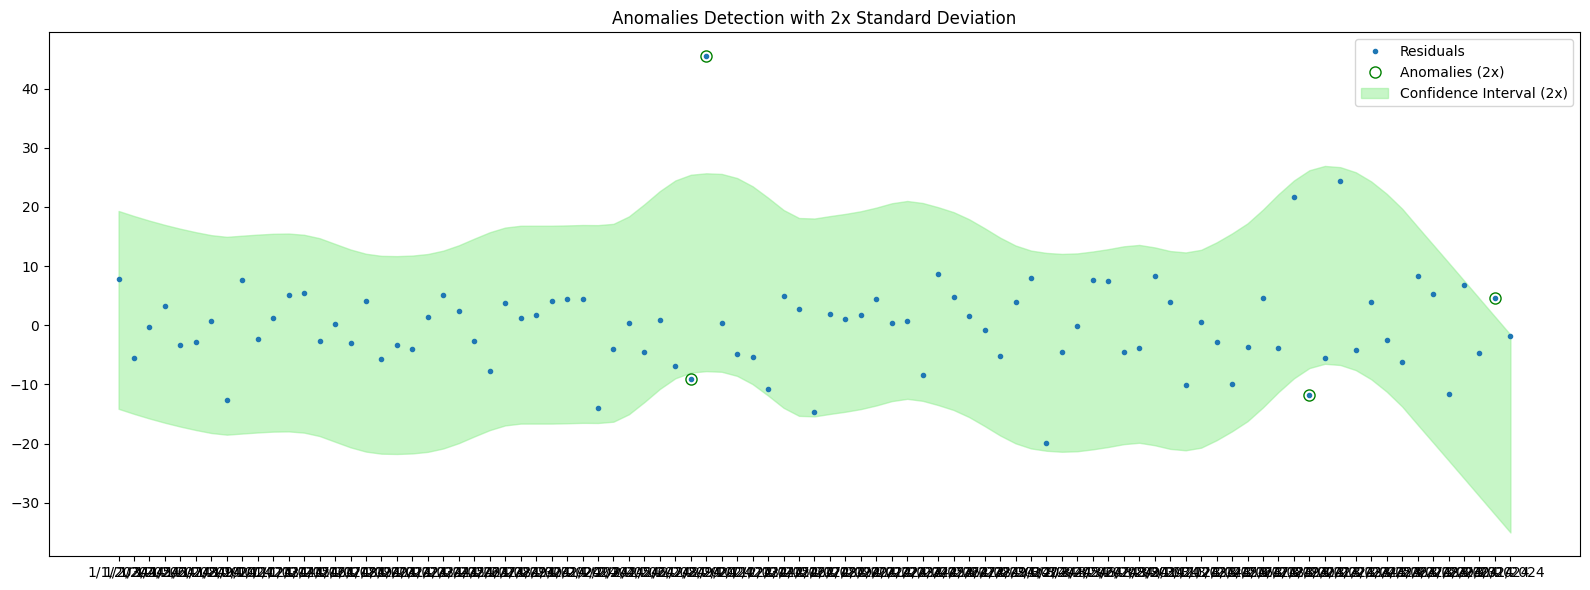

In [28]:
#
#
# Your code to find the anomalies that are 2 standard deviations away from the residuals
#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define 2x standard deviation bounds
trend_iv_l_minor_2x = pd.Series(data=res.trend.values - np.mean(res.trend) - 2 * np.std(res.resid), index=res.trend.index)
trend_iv_u_minor_2x = pd.Series(data=res.trend.values - np.mean(res.trend) + 2 * np.std(res.resid), index=res.trend.index)

# Detect anomalies 2 standard deviations away
minor_anom_2x = np.where((res.resid < trend_iv_l_minor_2x) | (res.resid > trend_iv_u_minor_2x), res.resid, np.nan)

# Plotting
fig, ax = plt.subplots(figsize=(16, 6))

# Plot the residuals
ax.plot(res.resid, marker='.', linestyle='none', label='Residuals')

# Plot the anomalies that are 2 standard deviations away (green circles)
ax.plot(pd.Series(minor_anom_2x, res.resid.index), marker='o', linestyle='none', label='Anomalies (2x)', color='green', fillstyle='none', markersize=8)

# Fill the 2x confidence interval (light green shaded area)
ax.fill_between(res.resid.index, trend_iv_l_minor_2x, trend_iv_u_minor_2x, color='lightgreen', alpha=0.5, label='Confidence Interval (2x)')

# Set the title and labels
ax.set_title('Anomalies Detection with 2x Standard Deviation')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()



<Axes: title={'center': 'Residuals'}, xlabel='timestamp'>

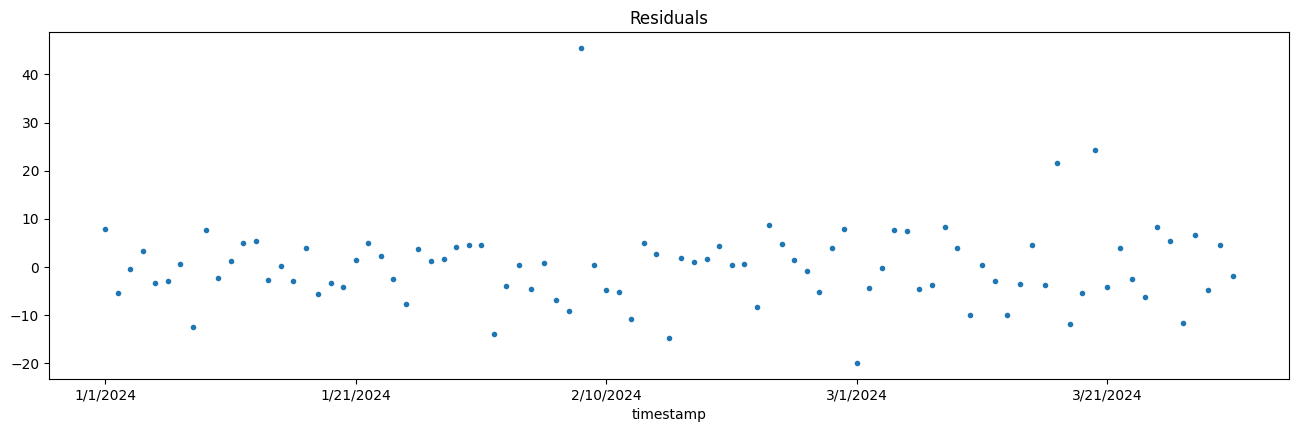

In [30]:
res.resid.plot(marker='.', linestyle='none', figsize=(16,4.5), title='Residuals')


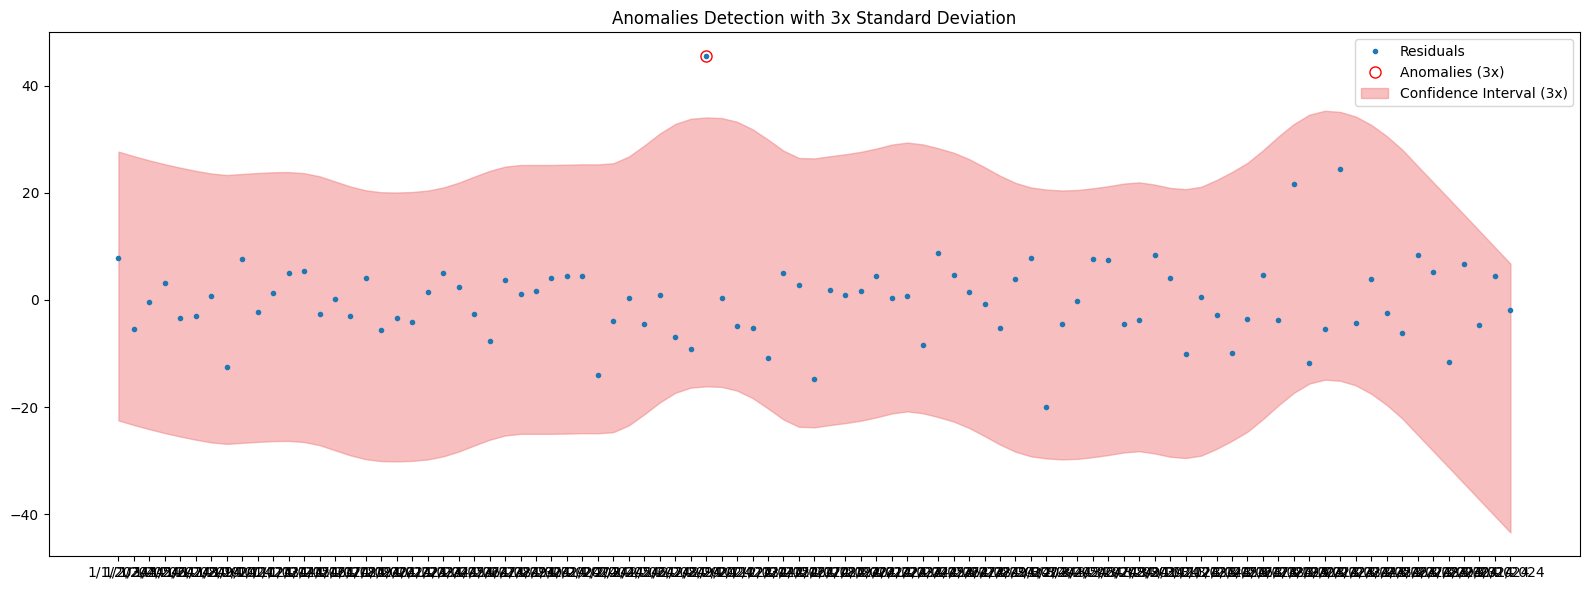

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define 3x standard deviation bounds
trend_iv_l_minor_3x = pd.Series(data=res.trend.values - np.mean(res.trend) - 3 * np.std(res.resid), index=res.trend.index)
trend_iv_u_minor_3x = pd.Series(data=res.trend.values - np.mean(res.trend) + 3 * np.std(res.resid), index=res.trend.index)

# Detect anomalies 3 standard deviations away
minor_anom_3x = np.where((res.resid < trend_iv_l_minor_3x) | (res.resid > trend_iv_u_minor_3x), res.resid, np.nan)

# Plotting the residuals and anomalies
fig, ax = plt.subplots(figsize=(16, 6))

# Plot the residuals
ax.plot(res.resid, marker='.', linestyle='none', label='Residuals')

# Plot the anomalies that are 3 standard deviations away (red circles)
ax.plot(pd.Series(minor_anom_3x, res.resid.index), marker='o', linestyle='none', label='Anomalies (3x)', color='red', fillstyle='none', markersize=8)

# Fill the 3x confidence interval (light red shaded area)
ax.fill_between(res.resid.index, trend_iv_l_minor_3x, trend_iv_u_minor_3x, color='lightcoral', alpha=0.5, label='Confidence Interval (3x)')

# Set the title and labels
ax.set_title('Anomalies Detection with 3x Standard Deviation')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Residuals'}, xlabel='timestamp'>

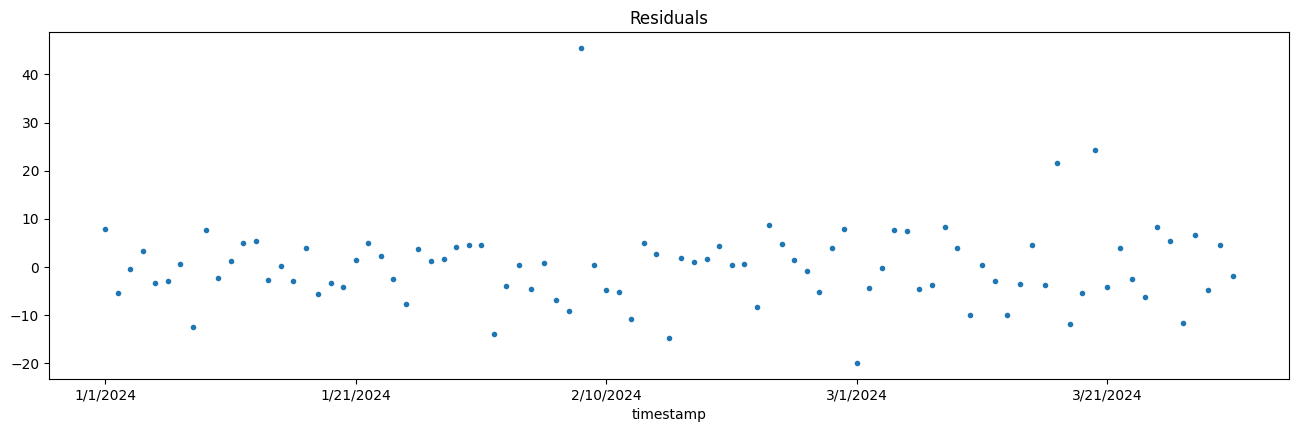

In [32]:
res.resid.plot(marker='.', linestyle='none', figsize=(16,4.5), title='Residuals')


Using a similar approach, write Python code to detect anomalies using the Z-score method. Apply 2-3 threshold values to detect anomalies, using the residual component for detection. Note that the formula for the Z-score is:
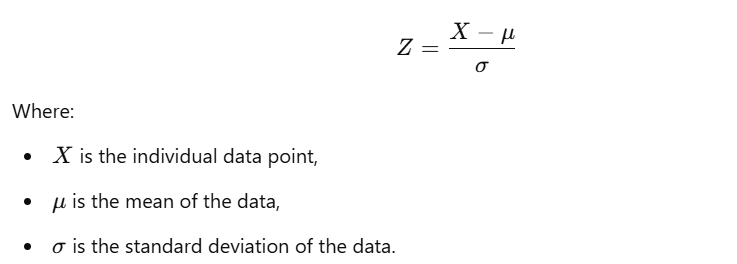

A point x is anomaly if Z-score for that point is greater than threshold.


In [37]:

#
# Your code to detect the anomalies using Z-score method. Use 2-3 different threshold.
#
z_scores = (res.resid - np.mean(res.resid)) / np.std(res.resid)
threshold_2 = 2
threshold_3 = 3
anomalies_2x = np.where(np.abs(z_scores) > threshold_2, res.resid, np.nan)
anomalies_3x = np.where(np.abs(z_scores) > threshold_3, res.resid, np.nan)




#Important: Lab Logbook Requirement:
#Plot the anomalies in next cell and include this graph in your lab logbook."

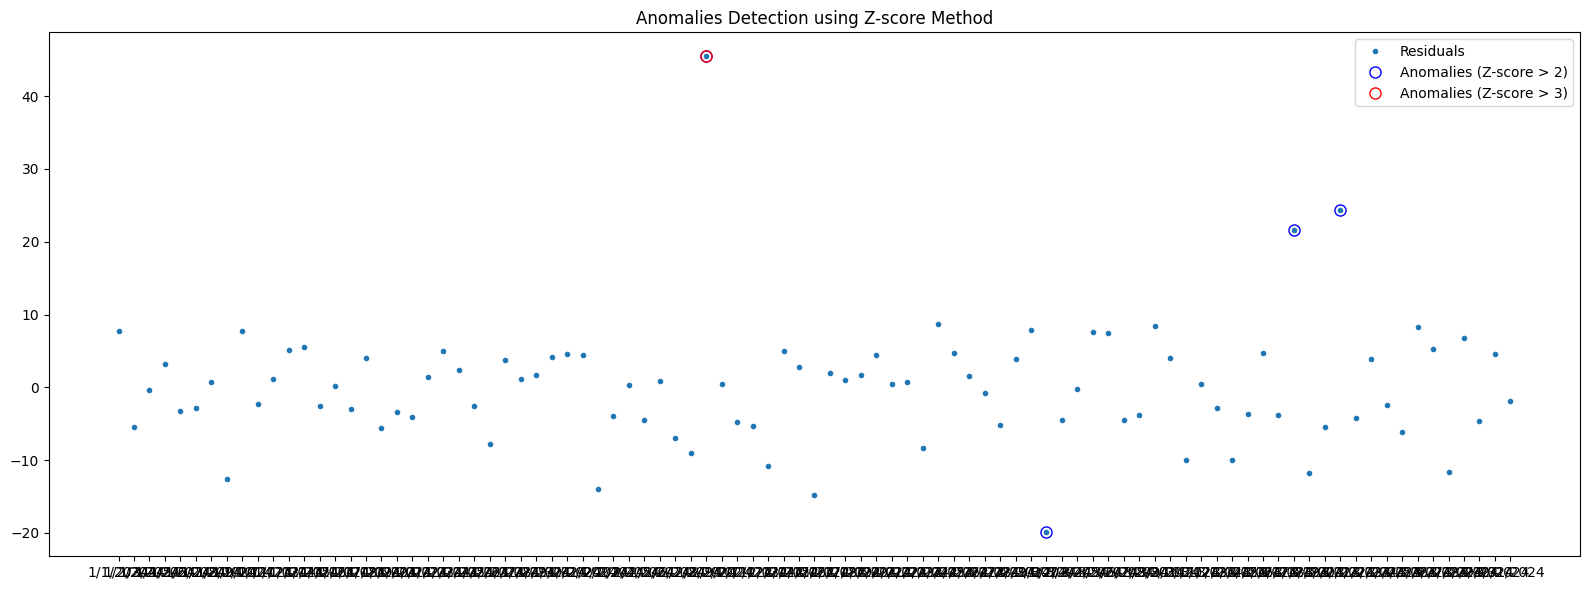

In [38]:
#
# Your code to plot the anomalies for three different types of threshold.

fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(res.resid, marker='.', linestyle='none', label='Residuals')
ax.plot(pd.Series(anomalies_2x, res.resid.index), marker='o', linestyle='none', label='Anomalies (Z-score > 2)', color='blue', fillstyle='none', markersize=8)

ax.plot(pd.Series(anomalies_3x, res.resid.index), marker='o', linestyle='none', label='Anomalies (Z-score > 3)', color='red', fillstyle='none', markersize=8)

ax.set_title('Anomalies Detection using Z-score Method')

ax.legend()
plt.tight_layout()
plt.show()


Using a similar approach, write Python code to detect anomalies using the IQR method. Apply 2-3 threshold values to detect anomalies, using the residual component for detection. Note that the formula for the IQR is:

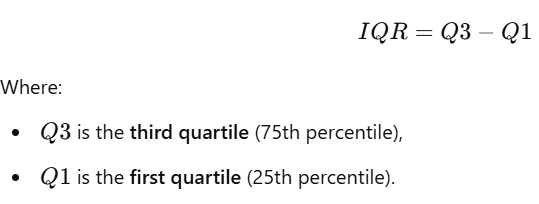

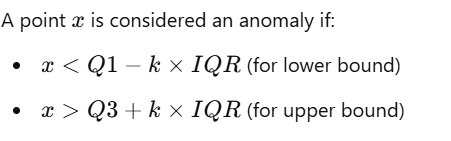

In [39]:
#
# Your code to detect the anomalies using IQR method. Use 2-3 different threshold.
#

Q1 = np.percentile(res.resid, 25)
Q3 = np.percentile(res.resid, 75)

IQR = Q3 - Q1

threshold_1 = 1.5
threshold_2 = 3

lower_bound_1 = Q1 - threshold_1 * IQR
upper_bound_1 = Q3 + threshold_1 * IQR

lower_bound_2 = Q1 - threshold_2 * IQR
upper_bound_2 = Q3 + threshold_2 * IQR
anomalies_1x = np.where((res.resid < lower_bound_1) | (res.resid > upper_bound_1), res.resid, np.nan)
anomalies_2x = np.where((res.resid < lower_bound_2) | (res.resid > upper_bound_2), res.resid, np.nan)



#Important: Lab Logbook Requirement:
#Plot the anomalies in next cell and include this graph in your lab logbook."

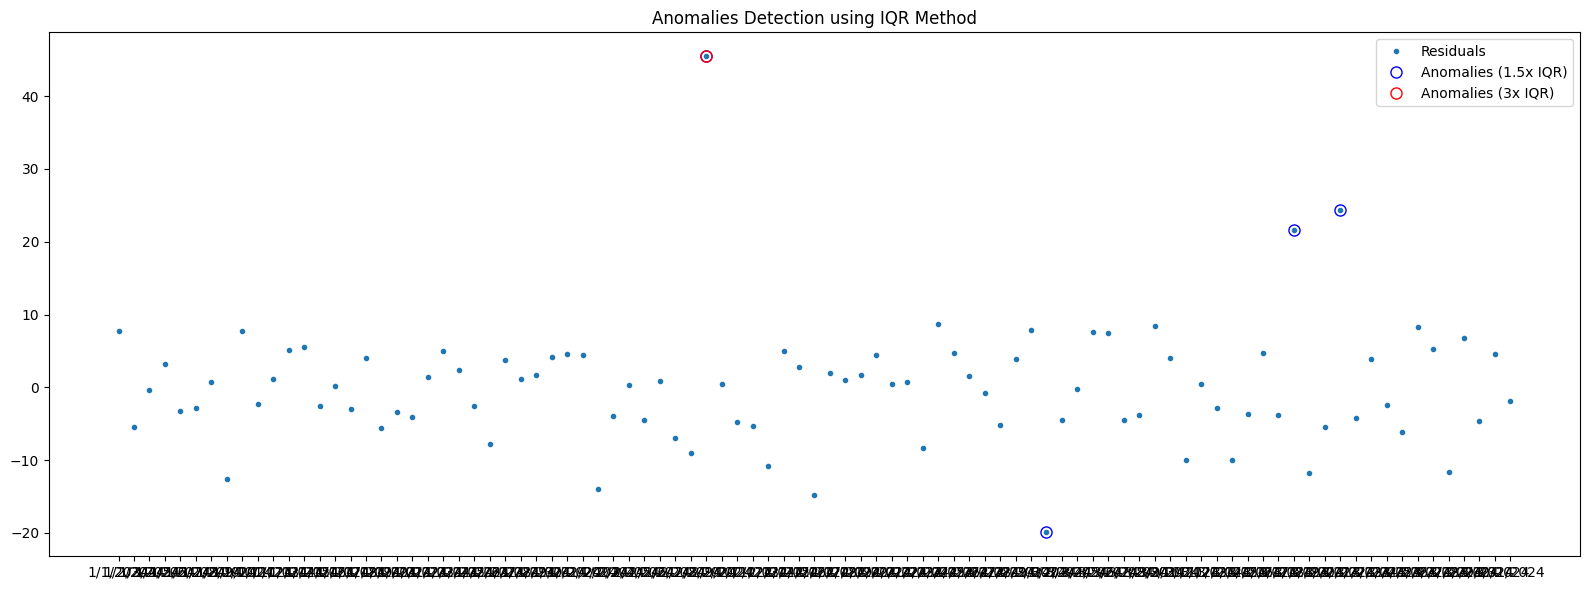

In [40]:
#
#
# Your code to plot the anomalies for three different k values.
# Plot original series as well as residuals.
#
#

# Plotting the residuals and anomalies
fig, ax = plt.subplots(figsize=(16, 6))

# Plot the residuals
ax.plot(res.resid, marker='.', linestyle='none', label='Residuals')

# Plot anomalies detected with 1.5x IQR (blue circles)
ax.plot(pd.Series(anomalies_1x, res.resid.index), marker='o', linestyle='none', label='Anomalies (1.5x IQR)', color='blue', fillstyle='none', markersize=8)

# Plot anomalies detected with 3x IQR (red circles)
ax.plot(pd.Series(anomalies_2x, res.resid.index), marker='o', linestyle='none', label='Anomalies (3x IQR)', color='red', fillstyle='none', markersize=8)

# Set the title and labels
ax.set_title('Anomalies Detection using IQR Method')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


## Folooing section is optional for this lab.

The code below uses Linear Regression. Based on the following code write your own code to detect anomalies in using ARIMA which is also one of the regression algorithm.

ARIMA is a model used to predict future value in a time series.
It looks at past data to find patterns and trends.

AR (AutoRegressive): Uses past values to predict future ones.
I (Integrated): Makes the data more stable by removing trends.
MA (Moving Average): Uses past errors (differences between actual and predicted values) to improve predictions.

You can use the Python library statsmodels.tsa.arima.model to implement ARIMA.
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html

You need to compare the ARIMA prediction and actual values and if they are significantly different then the points can be considered as anomolous.







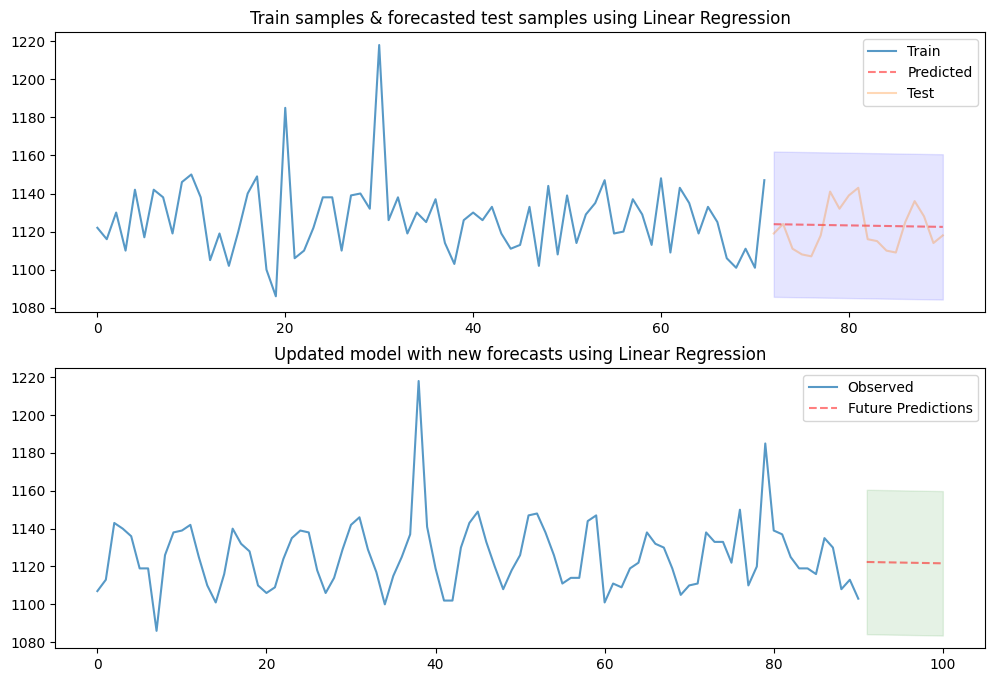

MSE for Linear Regression Forecast: 133.6046


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Splitting data into train and test
train, test = train_test_split(dau.values, train_size=0.8, random_state=42)

# Creating time indices as features for regression
train_indices = np.arange(len(train)).reshape(-1, 1)
test_indices = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)

# Training linear regression model
model = LinearRegression()
model.fit(train_indices, train)

# Making predictions
preds = model.predict(test_indices)

# Calculating confidence intervals (assuming normal distribution of residuals)
residuals = train - model.predict(train_indices)
std_dev = np.std(residuals)
conf_int = np.column_stack((preds - 1.96 * std_dev, preds + 1.96 * std_dev))

# Plotting results
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
x_axis = np.arange(len(train) + len(test))
axes[0].plot(x_axis[:len(train)], train, alpha=0.75, label="Train")
axes[0].plot(x_axis[len(train):], preds, alpha=0.5, linestyle='--', color='r', label="Predicted")
axes[0].plot(x_axis[len(train):], test, alpha=0.3, label="Test")
axes[0].fill_between(x_axis[len(train):], conf_int[:, 0], conf_int[:, 1], alpha=0.1, color='b')
axes[0].set_title("Train samples & forecasted test samples using Linear Regression")
axes[0].legend()

# Detecting anomalies
anomalies = (test < conf_int[:, 0]) | (test > conf_int[:, 1])
axes[0].scatter(x_axis[len(train):][anomalies], test[anomalies], color='red', label="Anomalies")

# Updating model with test data and predicting future values
new_indices = np.arange(len(dau.values), len(dau.values) + 10).reshape(-1, 1)
new_preds = model.predict(new_indices)
new_conf_int = np.column_stack((new_preds - 1.96 * std_dev, new_preds + 1.96 * std_dev))

axes[1].plot(np.arange(len(dau.values)), dau, alpha=0.75, label="Observed")
axes[1].plot(new_indices, new_preds, alpha=0.5, linestyle='--', color='r', label="Future Predictions")
axes[1].fill_between(new_indices.flatten(), new_conf_int[:, 0], new_conf_int[:, 1], alpha=0.1, color='g')
axes[1].set_title("Updated model with new forecasts using Linear Regression")
axes[1].legend()
plt.show()

# Compute MSE
mse_linear = mean_squared_error(test, preds)
print(f"MSE for Linear Regression Forecast: {mse_linear:.4f}")